In [1]:
import warnings
import matplotlib.pyplot as plt
import numpy as np
import time

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler

In [2]:
# so here i generate dataset specifically for dbscan algorithm to display it well

n_samples = 500
seed = 30
noisy_circles = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05, random_state=seed
)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05, random_state=seed)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=seed)
rng = np.random.RandomState(seed)
no_structure = rng.rand(n_samples, 2), None

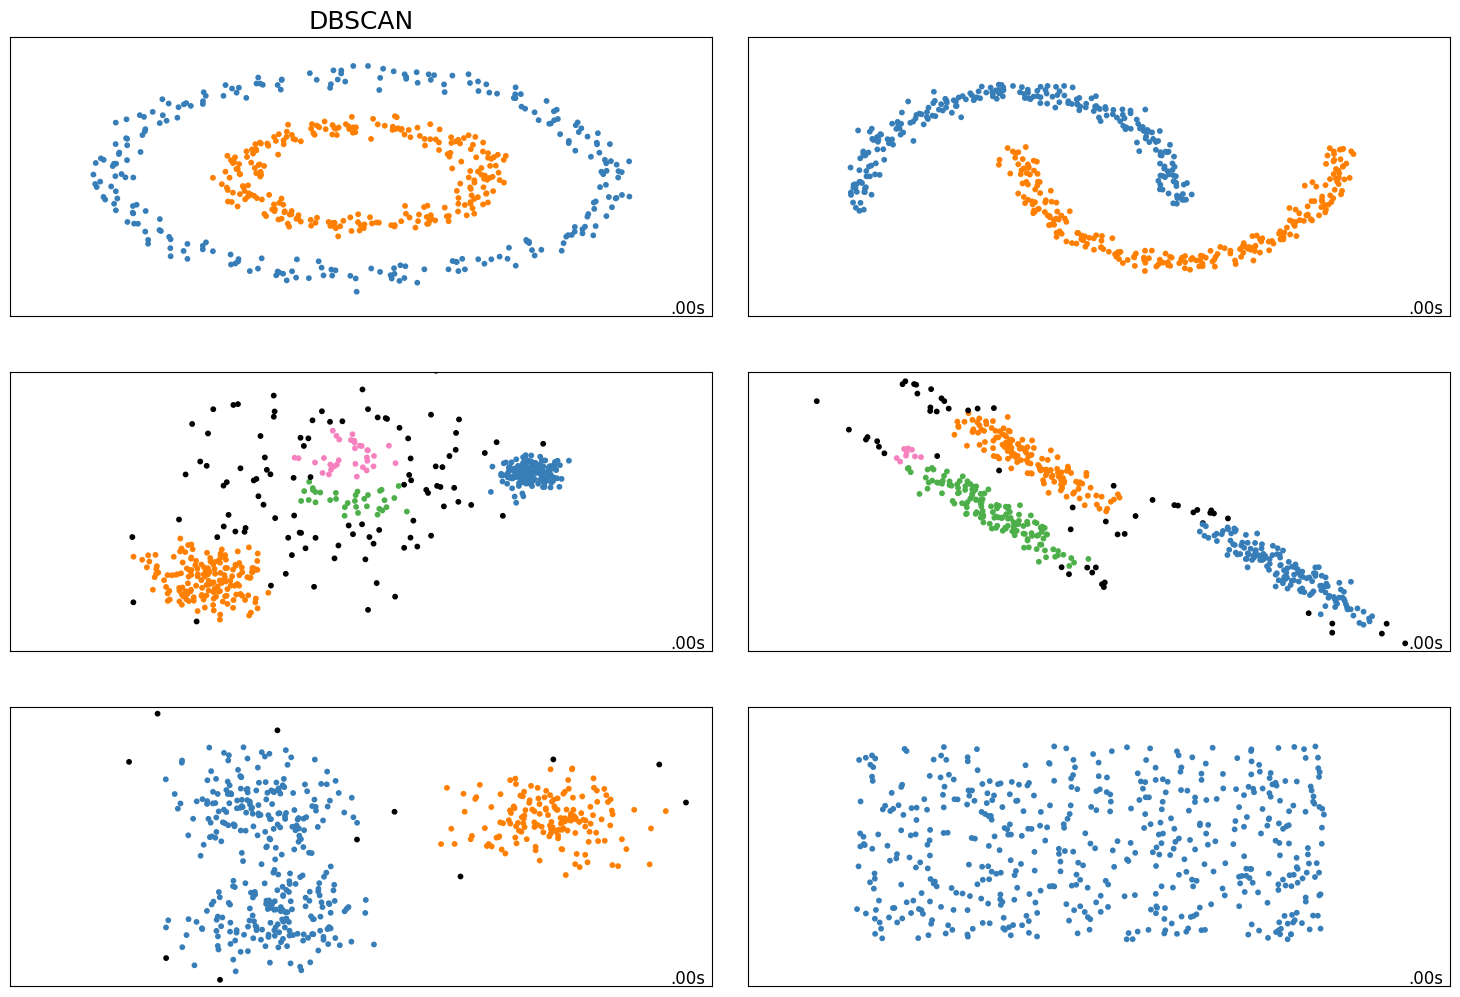

In [3]:
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

plt.figure(figsize=(15, 10))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.05, hspace=0.2
)

plot_num = 1
n_cols = 2 

default_base = {
    "eps": 0.3,
    "min_samples": 7,
}


dataset_list = [
    (noisy_circles, {"eps": 0.3}),
    (noisy_moons, {"eps": 0.2}),
    (varied, {"eps": 0.18}),
    (aniso, {"eps": 0.15}),
    (blobs, {"eps": 0.3}),
    (no_structure, {}),
]

n_rows = (len(dataset_list) + n_cols - 1) // n_cols  

for i_dataset, (dataset, algo_params) in enumerate(dataset_list):
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # here i normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    dbscan = cluster.DBSCAN(eps=params["eps"], min_samples=params["min_samples"])

    t0 = time.time()

    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=UserWarning)
        dbscan.fit(X)

    t1 = time.time()
    y_pred = dbscan.labels_.astype(int)

    plt.subplot(n_rows, n_cols, plot_num)
    if i_dataset == 0:
        plt.title("DBSCAN", size=18)

    colors = np.array(
        ["#377eb8", "#ff7f00", "#4daf4a", "#f781bf", "#a65628", "#984ea3", "#999999", "#e41a1c", "#dede00"]
    )
    colors = np.append(colors, ["#000000"])
    plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

    plt.xlim(-2.5, 2.5)
    plt.ylim(-2.5, 2.5)
    plt.xticks(())
    plt.yticks(())
    plt.text(
        0.99,
        0.01,
        ("%.2fs" % (t1 - t0)).lstrip("0"),
        transform=plt.gca().transAxes,
        size=12,
        horizontalalignment="right",
    )
    plot_num += 1

plt.show()